In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [165]:
data=pd.read_csv('weatherHistory.csv')
data_date=data['Formatted Date']
data_temperature=data['Temperature (C)']


print(data_date.shape)
print(data_temperature.shape)

(96453,)
(96453,)


In [166]:
new_date=[]
for d in data_date:
    period = pd.Period(d, freq='H')
    new_date.append(period.day_of_year)

In [167]:
new_date=np.array(new_date)
values, counts=np.unique(new_date,return_counts=True)

In [168]:
avg=[]
for i in range(0,len(new_date),24):
    avg.append(np.mean(data_temperature[i:i+24]))
avg=np.array(avg)

In [169]:
day_of_year=[]
for k in range(0,len(new_date),24):
    day_of_year.append(new_date[k])
day_of_year=np.array(day_of_year)

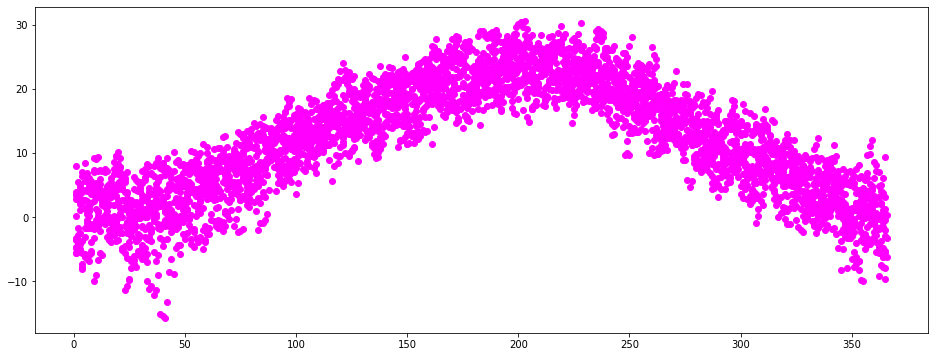

In [170]:
plt.figure(figsize=(16,6))
plt.scatter(day_of_year,avg,c='magenta')

In [177]:
#perceptron
def fit(X,Y):
    fig2,ax=plt.subplots()

    w=np.random.rand(1,1)
    lr=0.001
    b=0
    errors=[]
    for i in range(len(X)):
        y_pred=np.matmul(X[i],w)
        e=Y[i]-y_pred

        Y_pred = np.matmul(X, w)
        error = np.mean(np.abs(Y- Y_pred))
        errors.append(error)

        w= w + lr * X[i]* e
        
    ax.clear()
    plt.scatter(X,Y,c='magenta')
    ax.plot(X,Y_pred,c='blue',lw=2)
    plt.pause(0.01)
    
    return error,w


/tmp/ipykernel_6803/909308986.py:10: RuntimeWarning: overflow encountered in matmul
  y_pred=np.matmul(X[i],w)
/tmp/ipykernel_6803/909308986.py:13: RuntimeWarning: overflow encountered in matmul
  Y_pred = np.matmul(X, w)
/tmp/ipykernel_6803/909308986.py:17: RuntimeWarning: invalid value encountered in add
  w= w + lr * X[i]* e


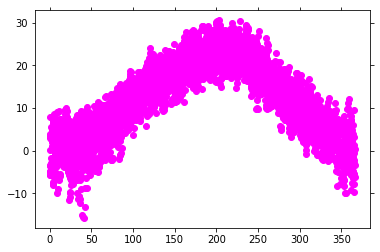

array([[nan]])

In [178]:
day_of_year=day_of_year.reshape(4019,1)
fit(day_of_year,avg)